# 결정트리 복습과제 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 결정트리 회귀 - 외삽

In [2]:
from google.colab import files
files.upload()

Saving ram_price.csv to ram_price.csv


{'ram_price.csv': b'date,price\r\n1957,411041792\r\n1959,67947725\r\n1960,5242880\r\n1965,2642412\r\n1970,734003\r\n1973,399360\r\n1974,314573\r\n1975,421888\r\n1975.08,180224\r\n1975.25,67584\r\n1975.75,49920\r\n1976,40704\r\n1976.17,48960\r\n1976.42,23040\r\n1976.58,32000\r\n1977.08,36800\r\n1978.17,28000\r\n1978.25,29440\r\n1978.33,19200\r\n1978.5,24000\r\n1978.58,16000\r\n1978.75,15200\r\n1979,10528\r\n1979.75,6704\r\n1980,6480\r\n1981,8800\r\n1981.58,4479\r\n1982,3520\r\n1982.17,4464\r\n1982.67,1980\r\n1983,2396\r\n1983.67,1980\r\n1984,1379\r\n1984.58,1331\r\n1985,880\r\n1985.33,720\r\n1985.42,550\r\n1985.5,420\r\n1985.58,350\r\n1985.67,300\r\n1985.83,300\r\n1985.92,300\r\n1986,300\r\n1986.08,300\r\n1986.17,300\r\n1986.25,300\r\n1986.33,190\r\n1986.42,190\r\n1986.5,190\r\n1986.58,190\r\n1986.67,190\r\n1986.75,190\r\n1986.92,190\r\n1987,176\r\n1987.08,176\r\n1987.17,157\r\n1987.25,154\r\n1987.33,154\r\n1987.42,154\r\n1987.5,154\r\n1987.58,154\r\n1987.67,163\r\n1987.75,133\r\n1987.8

In [3]:
ram_price=pd.read_csv('ram_price.csv') #데이터 불러오기
ram_price

,date,price
0,1957.00,4.110418e+08
1,1959.00,6.794772e+07
2,1960.00,5.242880e+06
3,1965.00,2.642412e+06
4,1970.00,7.340030e+05
...,...,...
328,2015.58,4.500000e-03
329,2015.67,4.300000e-03
330,2015.75,4.200000e-03
331,2015.83,3.800000e-03


년도에 따라 변화하는 램 가격을 시각화 해보겠습니다.

Text(0, 0.5, 'price($/Mbyte)')

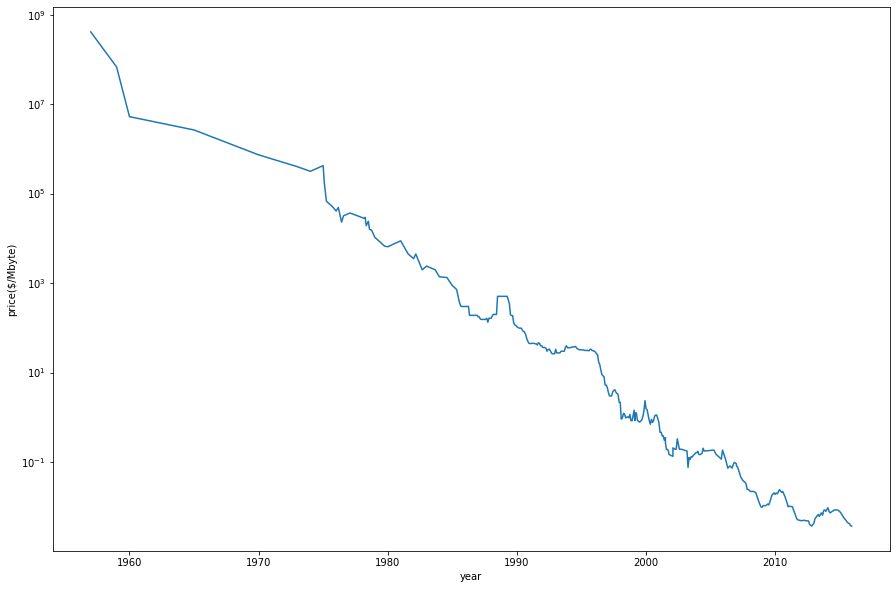

In [9]:
plt.figure(figsize=(15,10))
plt.semilogy(ram_price['date'],ram_price['price'])  #price의 min,max 차이가 너무 크기 때문에 log scale(자연로그)로 그려보겠습니다 plt.semilogy
plt.xlabel('year')
plt.ylabel('price($/Mbyte)')

시계열 데이터 이므로 미래 가격 예측을 위해 2000년도 전 후로 train,test set을 나누겠습니다.

In [10]:
data_train=ram_price[ram_price['date']<2000] #2000미만
data_test=ram_price[ram_price['date']>=2000] #2000이상

print(data_train.tail())
print('\n')
print(data_test.head())

        date  price
197  1999.50   0.78
198  1999.67   0.87
199  1999.75   1.04
200  1999.83   1.34
201  1999.92   2.35


        date  price
202  2000.00   1.56
203  2000.08   1.48
204  2000.17   1.08
205  2000.25   0.84
206  2000.33   0.70


In [30]:
X_train=np.array(data_train['date']).reshape(-1,2) #data_train의 date를 2차원 형태로 (학습데이터는 2차원이니까) X_train에 저장
y_train=np.log(data_train['price'])  #로그변환(자연로그)된 data_train의 price를 y_train에 저장

회귀 트리의 외삽을 증명하기 위해 선형회귀와 비교해보겠습니다

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#fit 시키세요
tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

X_all=np.array(ram_price['date']).reshape(-1,1) #ram_price의 모든 date를 입력데이터로 사용

#X_all을 각 모델에 predict 적용

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

#로그변환된 price로 train시켰으니 predict값을 원래 범위로 다시 변환 (지수 함수)
pred_tree=np.exp(pred_tree)
pred_lr=np.exp(pred_lr)

ValueError: ignored

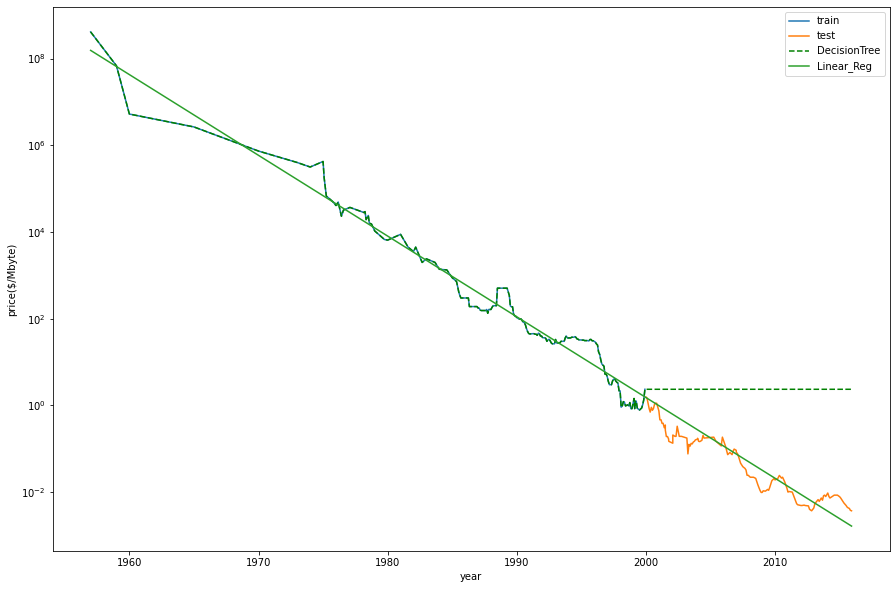

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('year')
plt.ylabel('price($/Mbyte)')
plt.semilogy("""문제""",label='train') #2000년대 이전 훈련 데이터 먼저 그리기
plt.semilogy("""문제""",label='test') #2000년대 이후 테스트 데이터 이어서 그리기
plt.semilogy("""문제""",'g--',label='DecisionTree') #tree
plt.semilogy("""문제""",label='Linear_Reg') #LinearReg
plt.legend(loc='best')

회귀 트리의 예측값의 경우 훈련데이터의 범위를 벗어나 새로운 값을 예측하지 못함을 증명함

# 결정트리 분류

In [32]:
from google.colab import files
files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


{'pima-indians-diabetes.csv': b'6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31.0,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0.0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38.0,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30.0,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29.0,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43,1\r\n1,97,66,15,140,23.2,0.487,22,0\r\n13,145,82,19,110,22.2,0.245,57,0\r\n5

In [33]:
pima=pd.read_csv('pima-indians-diabetes.csv')
pima

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [36]:
pima=pd.read_csv('pima-indians-diabetes.csv') #데이터로딩
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima.columns = col_names #pima columns명 col_names로 변경
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [37]:
#스케일링의 효과를 보기 위해 bp 변수 값들을 100배해서 스케일을 키워봅시다.
pima['bp'] = pima['bp']*100
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,6600,29,0,26.6,0.351,31,0
1,8,183,6400,0,0,23.3,0.672,32,1
2,1,89,6600,23,94,28.1,0.167,21,0
3,0,137,4000,35,168,43.1,2.288,33,1
4,5,116,7400,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,7600,48,180,32.9,0.171,63,0
763,2,122,7000,27,0,36.8,0.340,27,0
764,5,121,7200,23,112,26.2,0.245,30,0
765,1,126,6000,0,0,30.1,0.349,47,1


In [38]:
from sklearn.model_selection import train_test_split
X=pima.drop('label',axis = 1) #label제외한 변수들
y=pima['label'] #label

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

In [39]:
#스케일링 여부에 따른 성능 확인을 위해 스케일링 진행

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_X_train=scaler.fit_transform(X_train) 
scaled_X_test=scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

log_reg=LogisticRegression()
tree=DecisionTreeClassifier(random_state=42) #tree 생성 과정에서 random하게 feature들과 데이터 건수를 선택하는 로직이 포함되기 때문에 random_state 추가


print('Logistic Regression')

log_reg.fit(X_train,y_train) #스케일링 전 데이터로 학습시킨 후 스케일링 전 test set으로 점수내기
y_pred = log_reg.predict(X_test)
print('스케일링 전 f1 score :',accuracy_score(y_test,y_pred)) #accuracy_score 출력

log_reg.fit(scaled_X_train,y_train) #스케일링 후 데이터로 학습시킨 후 스케일링 후 test set으로 점수내기
y_pred = log_reg.predict(scaled_X_test)
print('스케일링 후 f1 score :',accuracy_score(y_test,y_pred)) #accuracy_score 출력

print('\nDecision Tree')
tree.fit(X_train,y_train) #스케일링 전 데이터로 학습시킨 후 스케일링 전 test set으로 점수내기
y_pred = tree.predict(X_test)
print('스케일링 전 f1 score :',accuracy_score(y_test,y_pred))
tree.fit(scaled_X_train,y_train) #스케일링 전 데이터로 학습시킨 후 스케일링 전 test set으로 점수내기
y_pred = tree.predict(scaled_X_test)
print('스케일링 후 f1 score :',accuracy_score(y_test,y_pred))

Logistic Regression
스케일링 전 f1 score : 0.6927083333333334
스케일링 후 f1 score : 0.703125

Decision Tree
스케일링 전 f1 score : 0.7083333333333334
스케일링 후 f1 score : 0.7083333333333334


In [45]:
#StratifiedKFold를 이용해 과적합을 확인해봅시다.
#스케일링 이전의 데이터 사용
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

cv_acc=[]
idx=1
for train_index,test_index in kfold.split(pima):
  X_train,X_test=X[train_index], X[test_index]
  y_train,y_test=y[train_index], y[test_index]

  tree=DecisionTreeClassifier(random_state=0)
  tree.fit(X_train,y_train)
  print(idx)
  idx+=1
  pred = tree.predict(X_test)
  print('train set score :',tree.score(X_train,y_train))
  val_acc=accuracy_score(y_test,pred)
  cv_acc.append(val_acc)
  print('test set score :',val_acc)
  print('\n')

print('평균 검증 정확도 :',np.mean(cv_acc))

TypeError: ignored

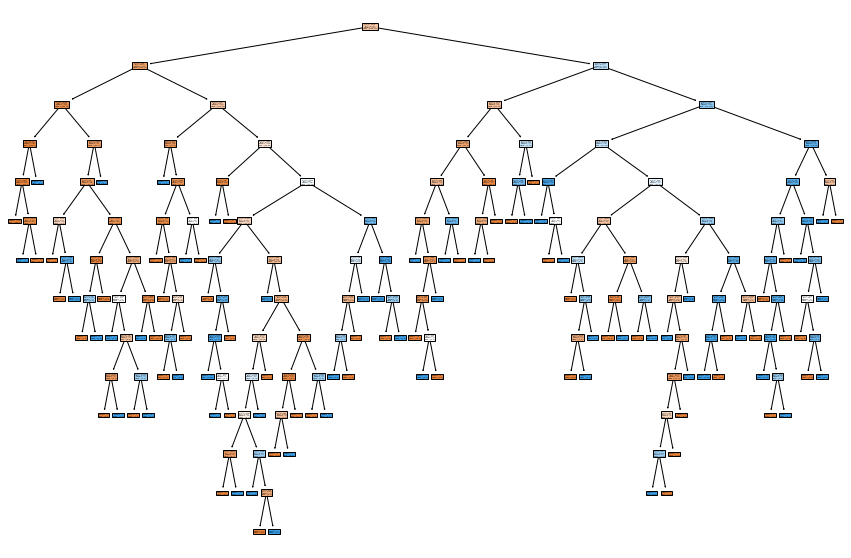

In [ ]:
# 과적합된 tree를 시각화.
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(tree,filled=True)
plt.show()
#색깔이 진할수록 해당 클래스 비율이 높은 노드임을 나타냄

GridSearchCV를 통해 과적합을 줄여봅시다

In [48]:
from sklearn.model_selection import GridSearchCV

tree=DecisionTreeClassifier(random_state=0)

param_grid = {
    'criterion':['gini','entropy'], 
    'max_depth':[None,3,5,7,9],  
    'min_samples_split':[2,3,4,5], 
    'min_samples_leaf':[1,2,3], 
    'max_features':[None,'sqrt','log2']
    }

gs_tree= GridSearchCV(cv = 5, scoring = 'accuracy', refit = True, param_grid = param_grid, estimator = tree) #GridSearchCV 객체 선언 scoring='accuracy',cv=5,refit=True 
gs_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 9],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [49]:
# 선정된 파라미터와 최고 점수를 출력해봅시다
print(gs_tree.best_params_)
print(gs_tree.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.7426086956521738


In [50]:
#refit=True이므로 gridsearch 결과물에 바로 train,test set의 score를 출력해봅시다.
print('train set score :',gs_tree.score(X_train,y_train))
print('test set score :',gs_tree.score(X_test,y_test))

train set score : 0.8539130434782609
test set score : 0.703125


In [54]:
gs_tree.best_estimator_.feature_importances_

array([0.04811604, 0.50643881, 0.03250858, 0.04299819, 0.03332091,
       0.19562281, 0.06571575, 0.0752789 ])

feature importance를 seaborn을 통해 시각화

In [62]:
pima.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

,importances
1,0.506439
5,0.195623
7,0.075279
6,0.065716
0,0.048116
3,0.042998
4,0.033321
2,0.032509


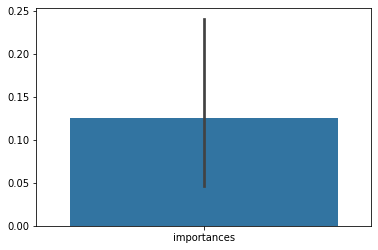

In [73]:
import seaborn as sns

fi=pd.DataFrame(data = gs_tree.best_estimator_.feature_importances_,columns = ['importances']) # feature importance를 데이터프레임으로 만들기 columns : ['feature','importances']

fi=fi.sort_values('importances', ascending = False) #importances를 기준으로 내림차순 sorting
fi
plt.barh(pima.feature_names,)

In [74]:
X.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age'],
      dtype='object')

plot_tree로 분기된 상태를 시각화 해보겠습니다

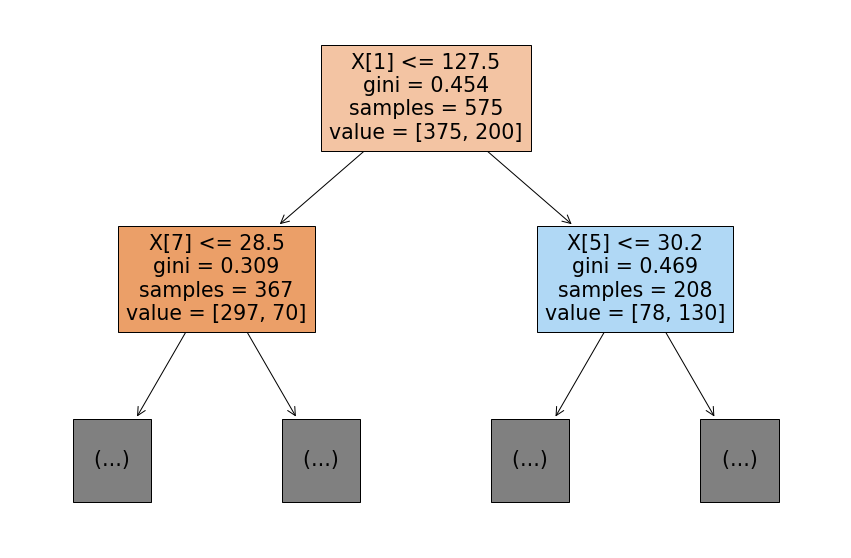

In [76]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(gs_tree.best_estimator_,filled=True,max_depth=1)
plt.show()

feature_importance가 가장 높은 'glucose' 는 X.columns[1]이고 root node에서 분기의 기준으로 쓰였습니다. (feature importance의 절대적 기준은 아님)

# K-Fold Cross Validation

### 데이터와 라이브러리


In [77]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action = 'ignore')

from sklearn.datasets import load_wine

### 와인의 data와 target을 구분해서 새로운 df를 만들어 주세요

In [78]:
# 데이터프레임화
df = load_wine()
wine_data = df.data
wine_label = df.target

data = pd.DataFrame(data = wine_data, columns = df.feature_names)
data['label'] = df.target

### XGBClassifier을 이용한 모델에 K-Fold를 적용시켜보겠습니다 5겹짜리로 만들어주세요

In [80]:
model = XGBClassifier()

# Kfold
split = 5
kf = KFold(n_splits = split)
n_iter = 0

features = data.iloc[:,:-1]
label = pd.DataFrame(data['label'])

### score list에 점수들을 추가해주세요 * append이용
### 평균 점수를 내주세요 * len이용

In [82]:
score_list = []
for train_idx, test_idx in kf.split(features, label):
  n_iter += 1
  print(f'--------------------{n_iter}번째 KFold-------------------')
  print(f'train_idx_len : {len(train_idx)} / test_idx_len : {len(test_idx)}')

  label_train = label.iloc[train_idx]
  label_test = label.iloc[test_idx]

  X_train, X_test = features.iloc[train_idx, :], features.iloc[test_idx, :]
  y_train, y_test = label.iloc[train_idx,:], label.iloc[test_idx,:]

  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  score = accuracy_score(y_test, preds)

  print(f'{n_iter}번째 단일 accuracy_score:{score}')
  score_list.append(score)


print('======================================================')
print(f'최종 평균 accuracy_socre : {np.mean(score_list)}')

--------------------1번째 KFold-------------------
train_idx_len : 142 / test_idx_len : 36
1번째 단일 accuracy_score:0.9166666666666666
--------------------2번째 KFold-------------------
train_idx_len : 142 / test_idx_len : 36
2번째 단일 accuracy_score:0.9722222222222222
--------------------3번째 KFold-------------------
train_idx_len : 142 / test_idx_len : 36
3번째 단일 accuracy_score:0.9444444444444444
--------------------4번째 KFold-------------------
train_idx_len : 143 / test_idx_len : 35
4번째 단일 accuracy_score:0.9714285714285714
--------------------5번째 KFold-------------------
train_idx_len : 143 / test_idx_len : 35
5번째 단일 accuracy_score:0.8571428571428571
최종 평균 accuracy_socre : 0.9323809523809523


### 이번에는 StratifiedKFold를 이용해봅니다(클래스별 분포를 고려한 방식)
#### 이번에도 5번 교차검증을 진행합니다

In [83]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


split = 5
skf = StratifiedKFold(n_splits = split)
n_iter = 0

In [84]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action = 'ignore')

from sklearn.datasets import load_wine

score_list = []
for train_idx, test_idx in skf.split(features, label):
  n_iter += 1
  print(f'------------------{n_iter}번째 StratifiedKFold-----------------')
  print(f'train_idx_len : {len(train_idx)} / test_idx_len : {len(test_idx)}')

  label_train = label.iloc[train_idx]
  label_test = label.iloc[test_idx]

  X_train, X_test = features.iloc[train_idx, :], features.iloc[test_idx, :]
  y_train, y_test = label.iloc[train_idx,:], label.iloc[test_idx,:]

  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  score = accuracy_score(y_test, preds)

  print(f'{n_iter}번째 단일 accuracy_score:{score}')
  score_list.append(score)


print('======================================================')
print(f'최종 평균 accuracy_socre : {sum(score_list)/len(score_list)}')

------------------1번째 StratifiedKFold-----------------
train_idx_len : 142 / test_idx_len : 36
1번째 단일 accuracy_score:0.9722222222222222
------------------2번째 StratifiedKFold-----------------
train_idx_len : 142 / test_idx_len : 36
2번째 단일 accuracy_score:0.9166666666666666
------------------3번째 StratifiedKFold-----------------
train_idx_len : 142 / test_idx_len : 36
3번째 단일 accuracy_score:0.9444444444444444
------------------4번째 StratifiedKFold-----------------
train_idx_len : 143 / test_idx_len : 35
4번째 단일 accuracy_score:0.9714285714285714
------------------5번째 StratifiedKFold-----------------
train_idx_len : 143 / test_idx_len : 35
5번째 단일 accuracy_score:1.0
최종 평균 accuracy_socre : 0.9609523809523809


### cross_val_score을 이용해봅시다
#### 위와 같은 복잡한 과정 필요없이 간단하게 동일한 결과를 만들어 낼 수 있습니다
#### cv값에 숫자를 직접 적어서 넣어도 됩니다

In [85]:
from sklearn.model_selection import cross_val_score

model = XGBClassifier()

score = cross_val_score(model, features, label, scoring = 'accuracy', cv = 10)
print(f"단일 accuracy : {score}")
print(f"10번의 fold 후 평균 accuracy: {np.mean(score)}")

단일 accuracy : [0.94444444 1.         0.94444444 0.94444444 0.88888889 1.
 1.         0.94444444 1.         1.        ]
5번의 fold 후 평균 accuracy: 0.9666666666666666


# Grid Search

### 필요한 라이브러리 import

In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd

### csv 파일 데이터프레임으로 만들기

In [87]:
from google.colab import files
files.upload()

Saving Admission_Data.csv to Admission_Data.csv


{'Admission_Data.csv': b'Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR ,CGPA,Research,Chance of Admit \n1,337,118,4,4.5,4.5,9.65,1,0.92\n2,324,107,4,4,4.5,8.87,1,0.76\n3,316,104,3,3,3.5,8,1,0.72\n4,322,110,3,3.5,2.5,8.67,1,0.8\n5,314,103,2,2,3,8.21,0,0.65\n6,330,115,5,4.5,3,9.34,1,0.9\n7,321,109,3,3,4,8.2,1,0.75\n8,308,101,2,3,4,7.9,0,0.68\n9,302,102,1,2,1.5,8,0,0.5\n10,323,108,3,3.5,3,8.6,0,0.45\n11,325,106,3,3.5,4,8.4,1,0.52\n12,327,111,4,4,4.5,9,1,0.84\n13,328,112,4,4,4.5,9.1,1,0.78\n14,307,109,3,4,3,8,1,0.62\n15,311,104,3,3.5,2,8.2,1,0.61\n16,314,105,3,3.5,2.5,8.3,0,0.54\n17,317,107,3,4,3,8.7,0,0.66\n18,319,106,3,4,3,8,1,0.65\n19,318,110,3,4,3,8.8,0,0.63\n20,303,102,3,3.5,3,8.5,0,0.62\n21,312,107,3,3,2,7.9,1,0.64\n22,325,114,4,3,2,8.4,0,0.7\n23,328,116,5,5,5,9.5,1,0.94\n24,334,119,5,5,4.5,9.7,1,0.95\n25,336,119,5,4,3.5,9.8,1,0.97\n26,340,120,5,4.5,4.5,9.6,1,0.94\n27,322,109,5,4.5,3.5,8.8,0,0.76\n28,298,98,2,1.5,2.5,7.5,1,0.44\n29,295,93,1,2,2,7.2,0,0.46\n30,310,99,2,1.

In [88]:
df = pd.read_csv('Admission_Data.csv')

### 'Serial No.' 삭제하기 (뒤에 . 주의)

In [89]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [90]:
df = df.drop('Serial No.', axis = 1)

### 대략적인 구조 보기

In [94]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Chance of Admit 제외한 새로운 df 생성 이후, 각 column들에 polynomialfeatures(degree = 2) 진행

In [102]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [103]:
X = df.drop('Chance of Admit ', axis = 1)

polynomial_transformer = PolynomialFeatures(degree = 2)
polynomial_features = polynomial_transformer.fit_transform(X.values)
features = polynomial_transformer.get_feature_names_out(X.columns)

### 새로 polynomial df를 생성

In [104]:
X = pd.DataFrame(polynomial_features, columns=features)
X.head()

,1,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,GRE Score^2,GRE Score TOEFL Score,...,SOP^2,SOP LOR,SOP CGPA,SOP Research,LOR ^2,LOR CGPA,LOR Research,CGPA^2,CGPA Research,Research^2
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,113569.0,39766.0,...,20.25,20.25,43.425,4.5,20.25,43.425,4.5,93.1225,9.65,1.0
1,1.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,104976.0,34668.0,...,16.00,18.00,35.480,4.0,20.25,39.915,4.5,78.6769,8.87,1.0
2,1.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,99856.0,32864.0,...,9.00,10.50,24.000,3.0,12.25,28.000,3.5,64.0000,8.00,1.0
3,1.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,103684.0,35420.0,...,12.25,8.75,30.345,3.5,6.25,21.675,2.5,75.1689,8.67,1.0
4,1.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,98596.0,32342.0,...,4.00,6.00,16.420,0.0,9.00,24.630,0.0,67.4041,0.00,0.0


### Chance of Admit 을 target으로 지정

In [105]:
y = df['Chance of Admit ']
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

### 하이퍼 파라미터들을 미리 지정

In [106]:
hyper_parameter = {
    'alpha': [0.01, 0.1, 1, 10],
    'max_iter': [100, 500, 1000, 1500, 2000]
}

### Lasso와 비교를 진행하기 위해 Lasso 모델에는 아무런 조치도 취하지 않고 객체를 만들어줍니다

In [107]:
model = Lasso()

### GridSearchCV를 호출하여 estimator = model, 파라미터는 위에서 지정한 하이퍼 파라미터, 5겹으로 교차검증을 진행합니다

In [108]:
hyper_parameter_tuner = GridSearchCV(estimator = model, cv = 5, param_grid = hyper_parameter)

### 새로 만든 모델을 학습시켜줍니다

In [109]:
hyper_parameter_tuner.fit(X,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'max_iter': [100, 500, 1000, 1500, 2000]})

### 최적의 파라미터값들을 찾습니다

In [110]:
hyper_parameter_tuner.best_params_

{'alpha': 0.1, 'max_iter': 500}

## 베이시안 최적화

### 베이시안 라이브러리 설치

In [111]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 베이시안 최적화를 import

In [112]:
from bayes_opt import BayesianOptimization
import numpy as np

### 목표 함수를 설정

In [113]:
def target(x):
    return np.exp(-(x-3)**2) + np.exp(-(3*x-2)**2) + 1/(x**2+1)

### 베이시안 최적화 객체 생성

In [114]:
bayes_optimizer = BayesianOptimization(target, {'x': (-2, 6)}, 
                                       random_state=0)

### 모델을 14회에 걸쳐서 진행
##### iter는 반복 회차, target은 목적 함수의 값, x는 입력값

In [115]:
bayes_optimizer.maximize(init_points=2, n_iter=14, acq='ei', xi=0.01)

|   iter    |  target   |     x     |
-------------------------------------
| 1         | 0.8386    | 2.391     |
| 2         | 0.6615    | 3.722     |
| 3         | 0.8388    | 2.391     |
| 4         | 0.9439    | 2.541     |
| 5         | 1.023     | 2.676     |
| 6         | 1.089     | 2.856     |
| 7         | 1.098     | 3.02      |
| 8         | 0.2003    | -1.998    |
| 9         | 0.02715   | 6.0       |
| 10        | 1.051     | 0.1121    |
| 11        | 1.707     | 0.6321    |
| 12        | 1.244     | 0.8781    |
| 13        | 1.633     | 0.5334    |
| 14        | 1.089     | 2.856     |
| 15        | 0.6326    | -0.7621   |
| 16        | 0.09098   | 4.74      |


##### 위와 같이 여러 횟수에 걸쳐서 실제 목표하는 함수에 최대한 다다르도록 추정한다